## Issue 2: Outlier Detection and Handling

- Description: Detect and handle outliers in the dataset to improve model performance and prevent biases caused by extreme values.  

- Solution Steps:
1. Load The Dataset which was cleaned in issue 1
2. Visualize Outliers using boxplots and histograms and compare before and after.
3. Analyse weather to perform Outliers using techniques like IQR or Z-Score.

## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Loading Cleaned Dataset from Issue 1

In [ ]:
data = pd.read_csv('cleaned-in-vehicle-coupon-recommendation.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,no urgent place,alone,sunny,55,2pm,restaurant(<20),1d,female,21,unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,no urgent place,friend(s),sunny,80,10am,coffee house,2h,female,21,unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,no urgent place,friend(s),sunny,80,10am,carry out & take away,2h,female,21,unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,no urgent place,friend(s),sunny,80,2pm,coffee house,2h,female,21,unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,no urgent place,friend(s),sunny,80,2pm,coffee house,1d,female,21,unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.559794,0.116019,0.215543,0.567565
std,19.153386,0.492657,0.496432,0.320260,0.411215,0.495434
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing Different Graphs in Dataset to detect Outliers

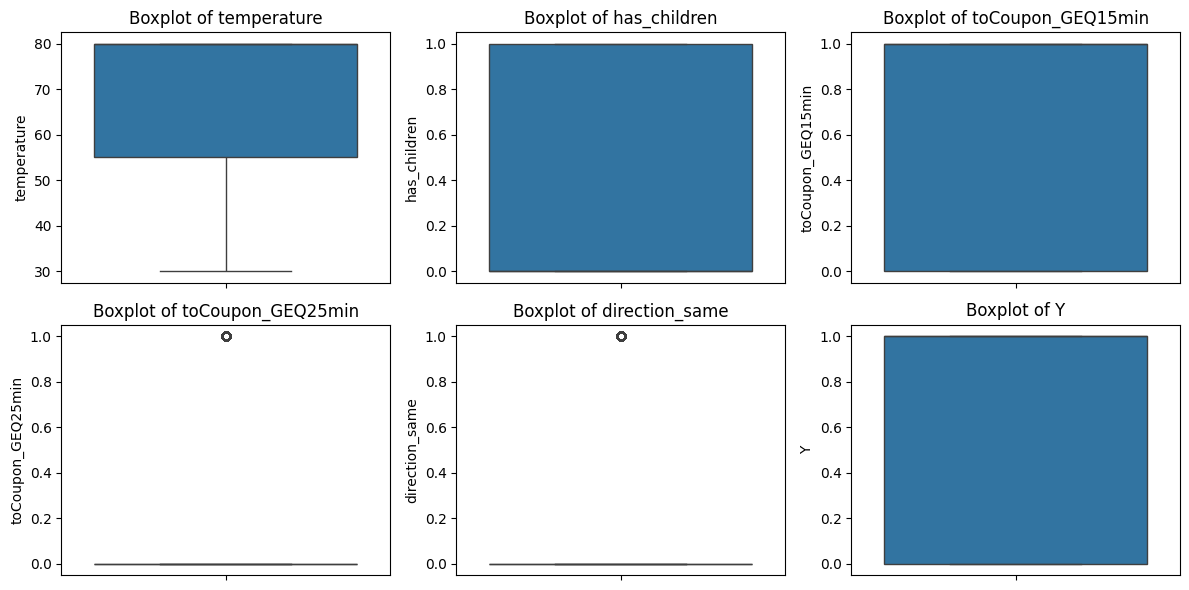

In [ ]:
## Boxplot -> Best For Identifying Outliers in Numerical columns

numerical_columns = data.select_dtypes(include=['number']).columns

def plot_boxplot(df):

    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numerical_columns):
        plt.subplot(2, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

plot_boxplot(data)


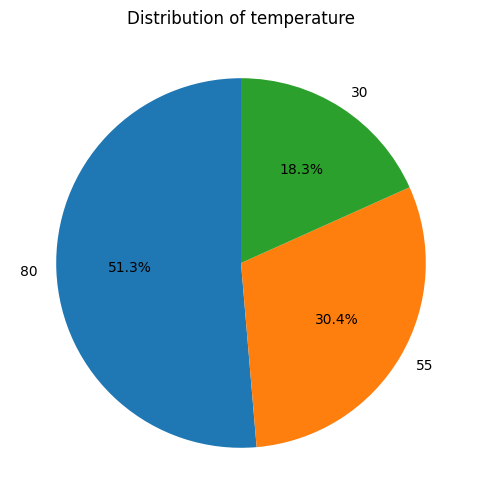

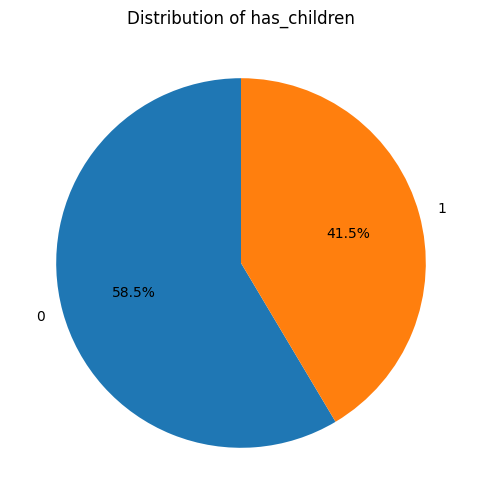

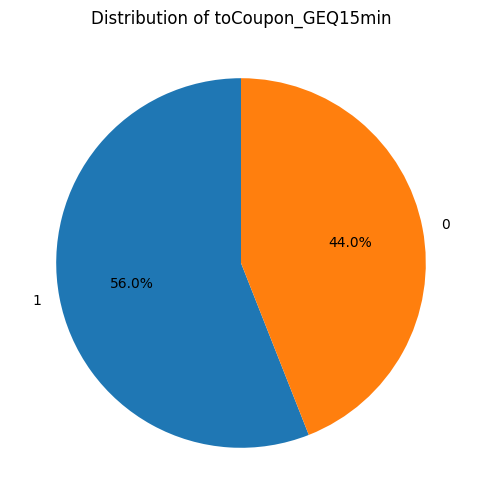

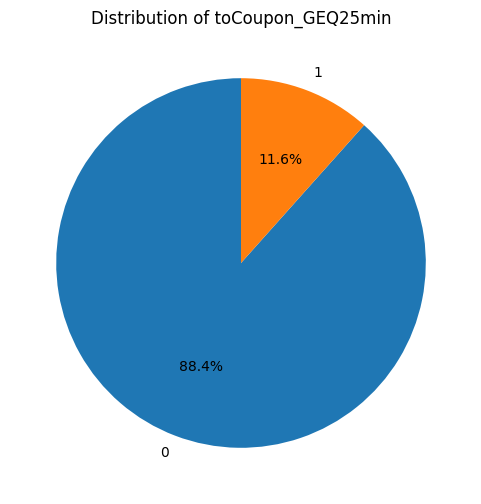

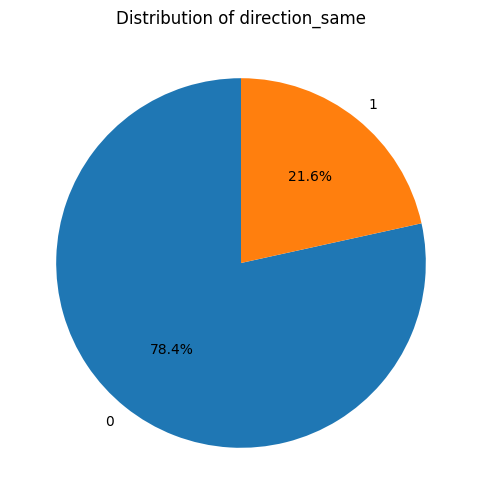

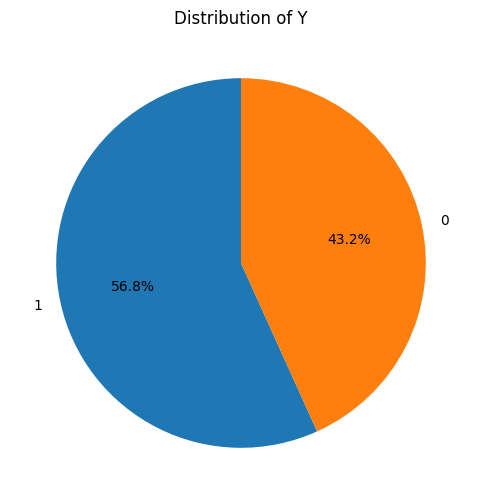

In [ ]:
# Pie Chart -> Check of percentage weightage of each unique value in a column
def pie_chart(df):

  for col in numerical_columns:
    value_counts = df[col].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution of {col}")
    plt.show()

pie_chart(data)

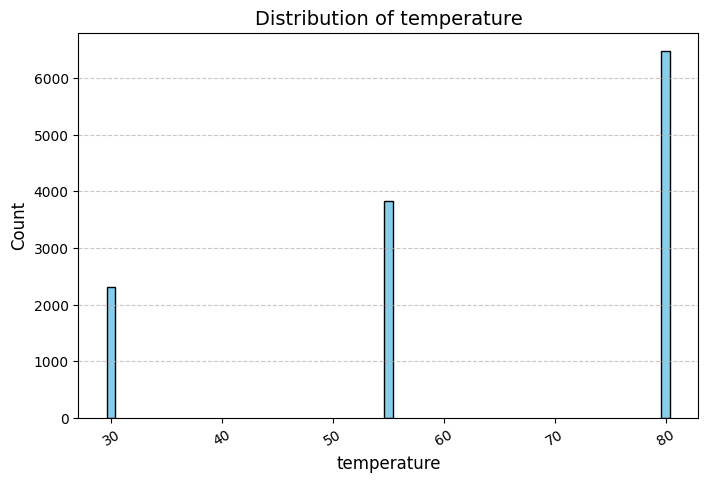

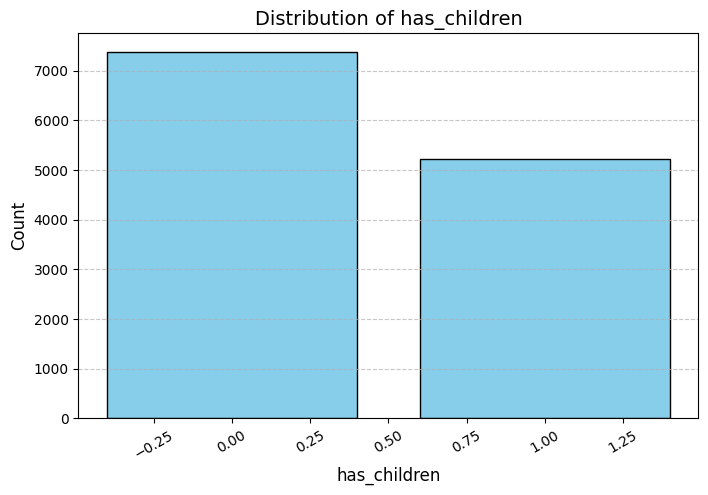

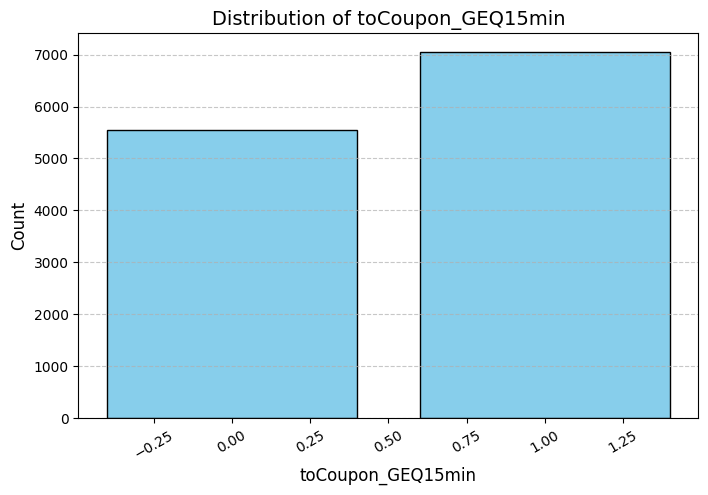

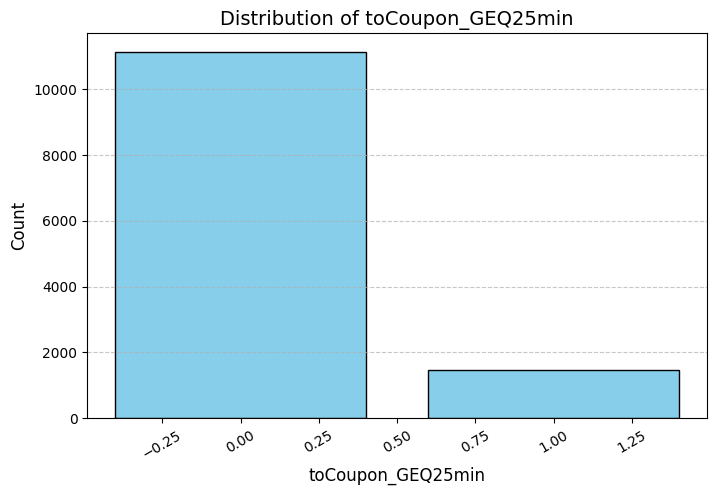

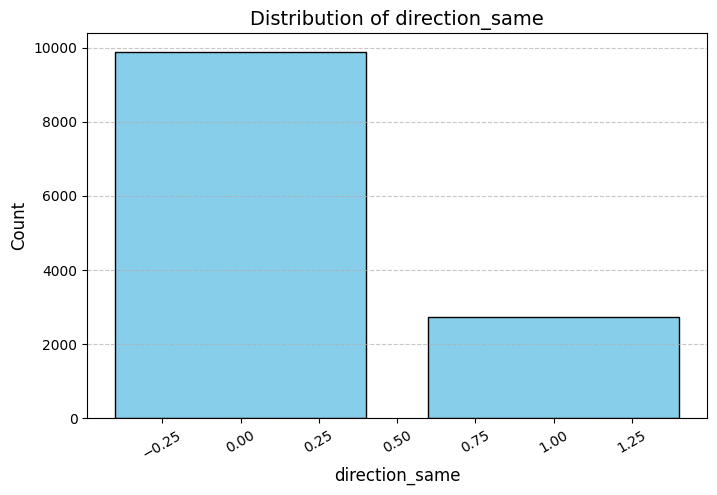

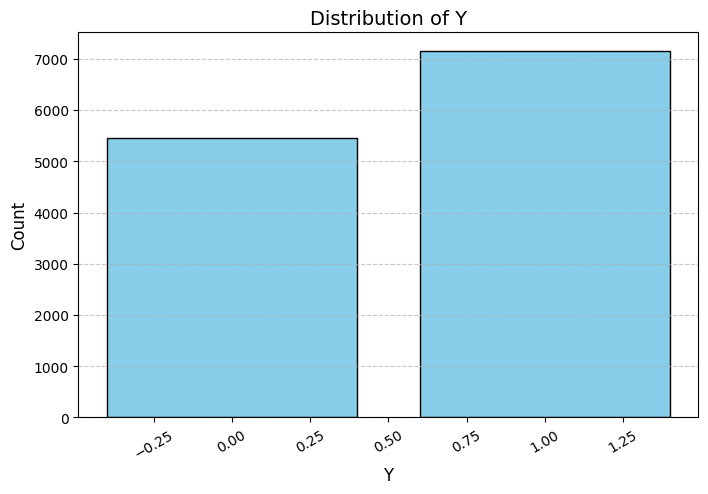

In [ ]:
def bar_chart(df):

  for col in numerical_columns:
    value_counts = df[col].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

bar_chart(data)

In [ ]:
# As we can see None of the column contains continous range of values
# Mainly all the columns contains values with limited categories
# so techniques like IQR and Z-score cannot be applied here as it will only worsen the dataset
def unique_values(df):

  for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("-" * 50)

unique_values(data)

Unique values in column 'destination':
['no urgent place' 'home' 'work']
--------------------------------------------------
Unique values in column 'passanger':
['alone' 'friend(s)' 'kid(s)' 'partner']
--------------------------------------------------
Unique values in column 'weather':
['sunny' 'rainy' 'snowy']
--------------------------------------------------
Unique values in column 'temperature':
[55 80 30]
--------------------------------------------------
Unique values in column 'time':
['2pm' '10am' '6pm' '7am' '10pm']
--------------------------------------------------
Unique values in column 'coupon':
['restaurant(<20)' 'coffee house' 'carry out & take away' 'bar'
 'restaurant(20-50)']
--------------------------------------------------
Unique values in column 'expiration':
['1d' '2h']
--------------------------------------------------
Unique values in column 'gender':
['female' 'male']
--------------------------------------------------
Unique values in column 'age':
['21' '46' 

# Final Analyses

1. As we can see from the above visualization that the dataset is highly imbalanced.
2. As Column direction_same and toCoupoun_GEQ25min have around 90:10 ratio.
3. Also the columns don't contain any countinous range of values so performing outlier detection techniques like IQR or Z-score will only worsen the dataset.
4. Temperature Column can be a little suspisious if it is in farenhiet then 30,55,80 then 30 seems extreme value and if it is in celcius then 80 seems extreme value.
5. Instead of treating it as numerical value we will convert it to encoded values like 0,1,2 for future use as it seems more like categories rather than continous numerical value.

- My Final Analyses says that performing outlier detection techniques like Z-score or IQR will not make dataset better instead worsen it so we will leave the dataset as it is for now and convert to encoded values to make it better and for data imbalancing we will perform techniques like Smote in future notebooks.